In [1]:
from pylab import *
import scipy.signal as signal
import matplotlib.pyplot as plt

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    plt.plot(w/max(w),h_dB)
    plt.ylim(-150, 5)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')

    plt.subplot(122)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plt.plot(w/max(w),h_Phase)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response')
    subplots_adjust(hspace=0.5)

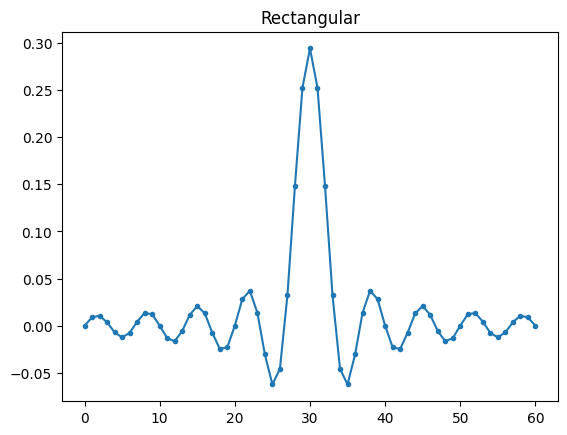

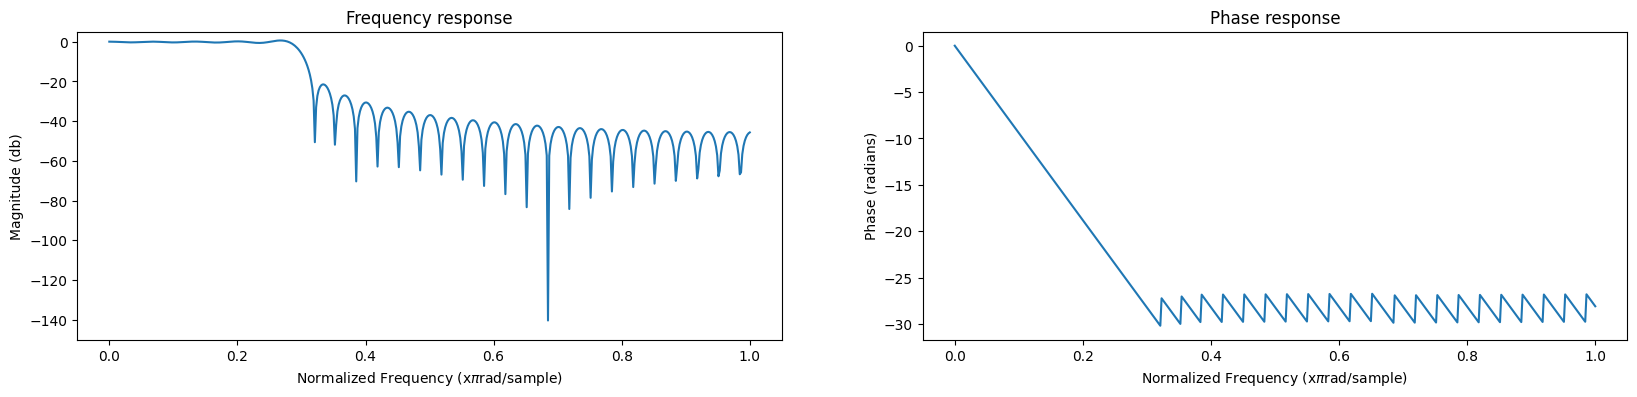

In [2]:
n = 61
filter_rec = signal.firwin(n, cutoff = 0.3, window = "rectangular")
plt.title('Rectangular')
plt.plot(filter_rec,'.-')
mfreqz(filter_rec)

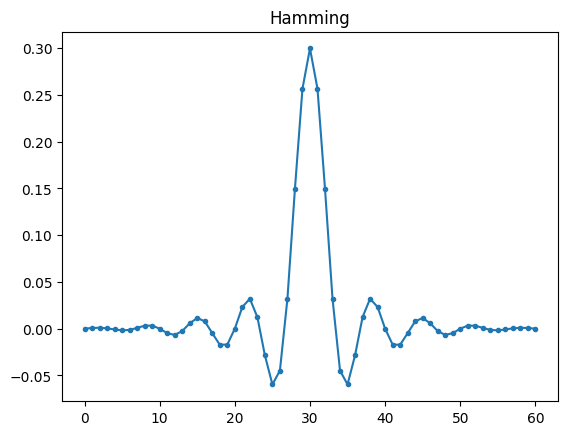

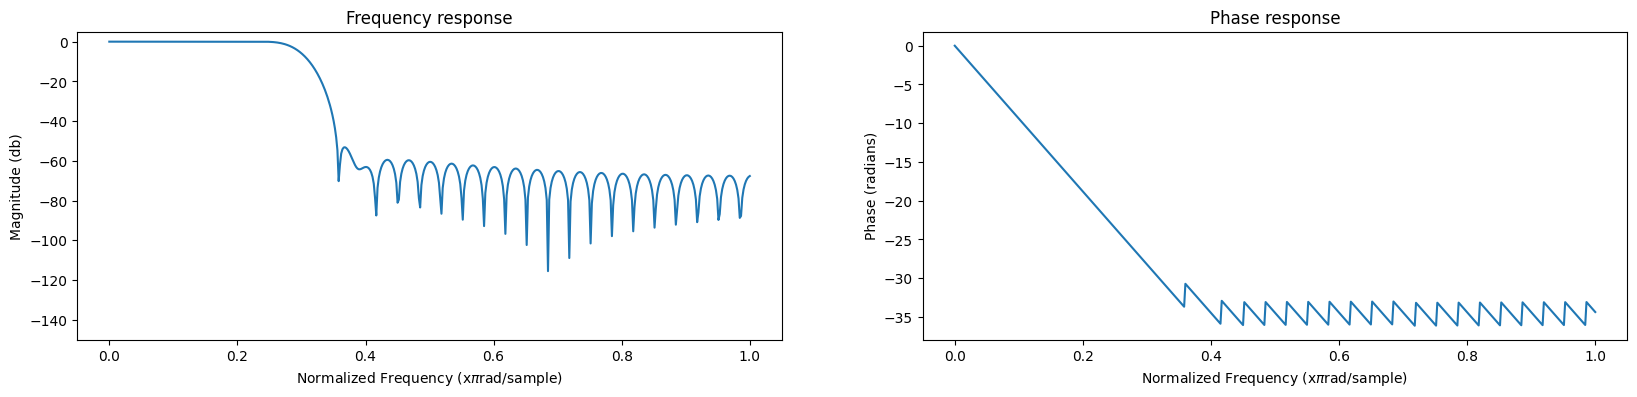

In [3]:
n = 61
filter_ham = signal.firwin(n, cutoff = 0.3, window = "hamming")
plt.title('Hamming')
plt.plot(filter_ham,'.-')
mfreqz(filter_ham)

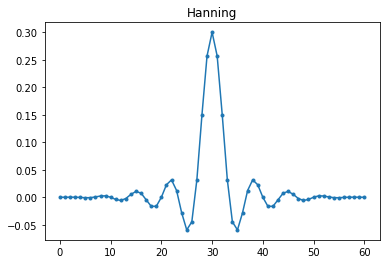

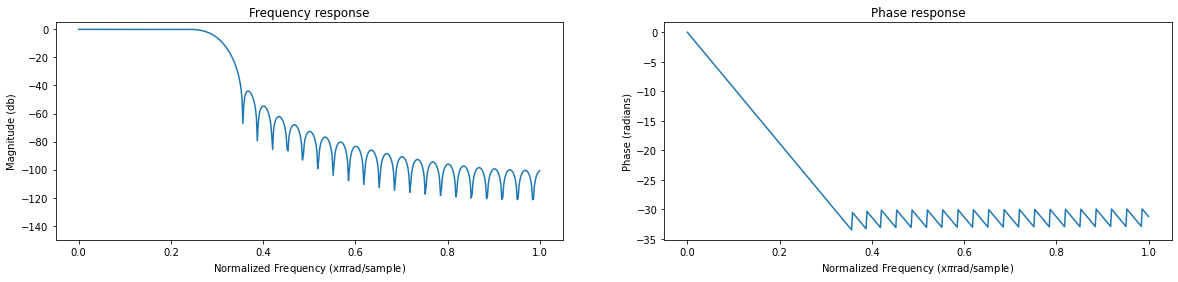

In [ ]:
n = 61
filter_han = signal.firwin(n, cutoff = 0.3, window = "hanning")
plt.title('Hanning')
plt.plot(filter_han,'.-')
mfreqz(filter_han)

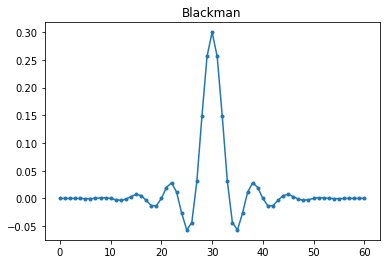

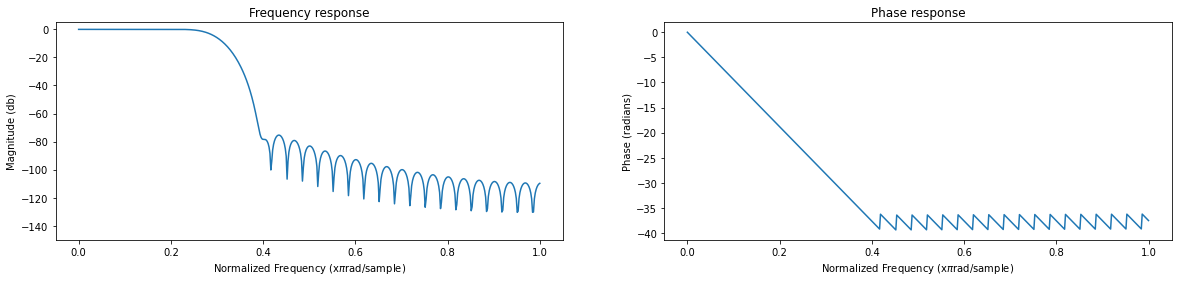

In [ ]:
n = 61
filter_blk = signal.firwin(n, cutoff = 0.3, window = "blackman")
plt.title('Blackman')
plt.plot(filter_blk,'.-')
mfreqz(filter_blk)

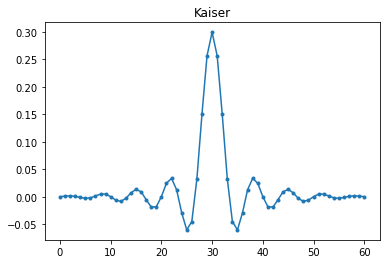

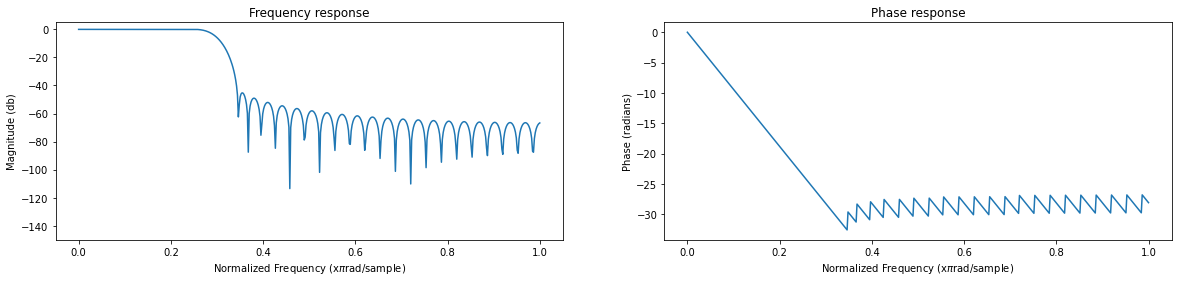

In [ ]:
n = 61
filter_ksr = signal.firwin(n, cutoff = 0.3, window = ("kaiser",4))
plt.title('Kaiser')
plt.plot(filter_ksr,'.-')
mfreqz(filter_ksr)

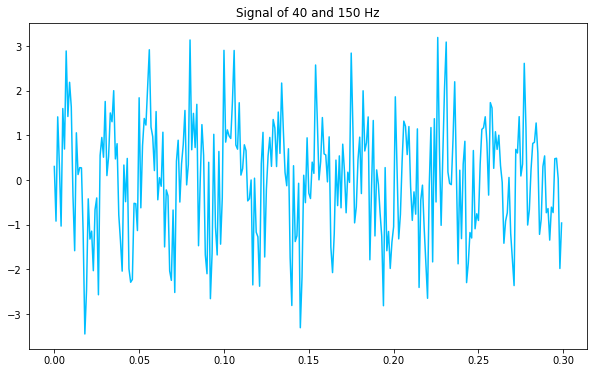

In [ ]:
from numpy import sin, arange, pi
import matplotlib.pyplot as plt
import numpy as np

# Create a signal with 300 samples of (40Hz + 150 Hz) at 1 kHz
sample_rate = 1000
nsamples = 300

f1 = 40
A1 = 1.0

f2 = 150
A2 = 0.5

t = arange(nsamples) / sample_rate
signal = A1 * sin(2*pi*f1*t) + A2*sin(2*pi*f2*t)+np.random.normal(0, 1, nsamples)

plt.figure(figsize=(10,6))
plt.plot(t, signal,color='deepskyblue')
plt.title('Signal of 40 and 150 Hz')
plt.show()

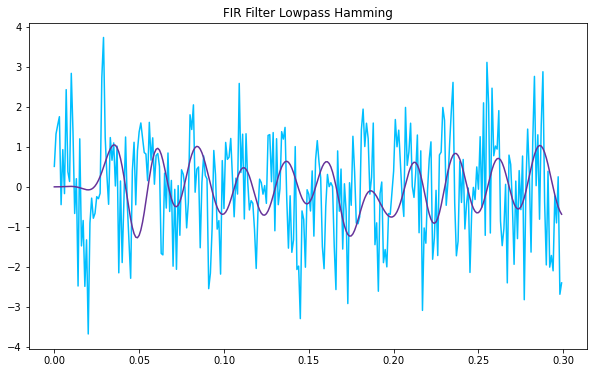

In [ ]:
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
from scipy.signal import lfilter, firwin

nyq_rate = sample_rate / 2.
cutoff_hz = 50
numtaps = 61
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate, window='hamming')

filtered_signal_fir = lfilter(fir_coeff, 1.0, signal)

warmup = numtaps - 1
delay = (warmup / 2) / sample_rate

plt.figure(figsize=(10,6))
plt.plot(t, signal,color='deepskyblue')
plt.plot(t, filtered_signal_fir, '-',color='rebeccapurple')
# plt.plot(t-delay, filtered_signal_fir, '-',color='rebeccapurple')
plt.title('FIR Filter Lowpass Hamming')
plt.show()

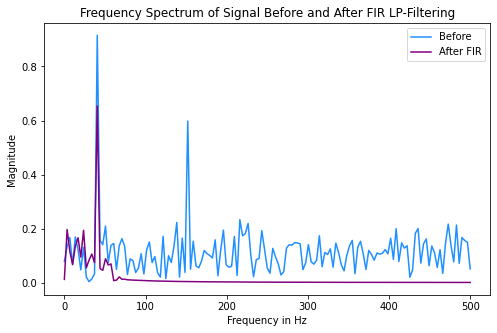

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np

plt.figure(figsize=(8, 5))
dt = 1/sample_rate
xf = np.linspace(0.0, 1.0/(2.0*dt), (nsamples-1)//2)
Sigf = fft(signal)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(Sigf[0:(nsamples-1)//2]),color='dodgerblue',label='Before')

FiltdSigf = fft(filtered_signal_fir)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(FiltdSigf[0:(nsamples-1)//2]),color='purple',label='After FIR')
plt.ylabel('Magnitude')
plt.xlabel('Frequency in Hz')
plt.title('Frequency Spectrum of Signal Before and After FIR LP-Filtering', fontsize=12)
plt.legend()
plt.show()

# IIR

## Analog

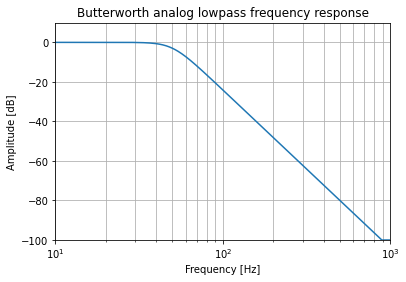

In [ ]:
import numpy as np
from scipy.signal import lfilter, iirfilter,freqs
import matplotlib.pyplot as plt

#4th-order Butterworth analog lowpass filter for 50 Hz
b, a = iirfilter(4, Wn=[2*np.pi*50], btype='low', analog=True, ftype='butter')
w, h = freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Butterworth analog lowpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

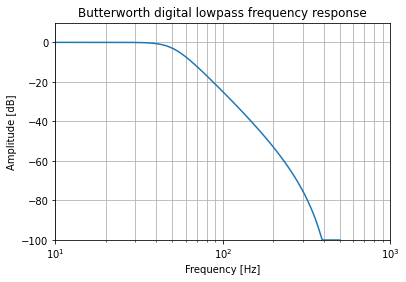

In [ ]:
import numpy as np
from scipy.signal import lfilter, iirfilter,freqs,freqz
import matplotlib.pyplot as plt

#4th-order Butterworth analog lowpass filter for 50 Hz
b,a = iirfilter(4, Wn=50, fs=sample_rate, btype='low',ftype='butter')
w, h = freqz(b,a, 1000, fs=sample_rate)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Butterworth digital lowpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

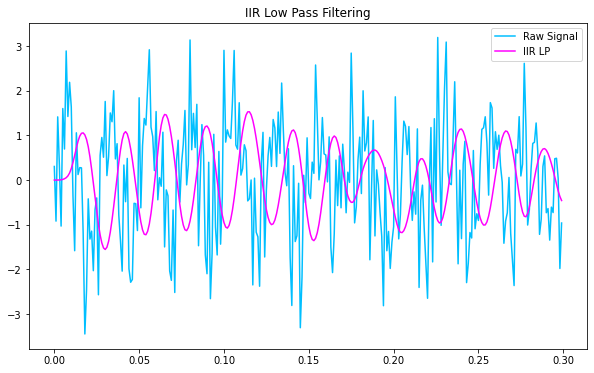

In [ ]:
#------------------------------------------------
# Create a IIR filter and apply it to signal.
#------------------------------------------------
from scipy.signal import lfilter, iirfilter

b, a = iirfilter(4, Wn=50, fs=sample_rate, btype="low", ftype="butter")
filtered_signal_iir = lfilter(b, a, signal)

# warmup = numtaps - 1
# delay = (warmup / 2) / sample_rate

plt.figure(figsize=(10,6))
plt.plot(t, signal,color='deepskyblue',label='Raw Signal')
plt.plot(t, filtered_signal_iir, '-',color='fuchsia', label='IIR LP')
plt.title('IIR Low Pass Filtering')
plt.legend()
plt.show()

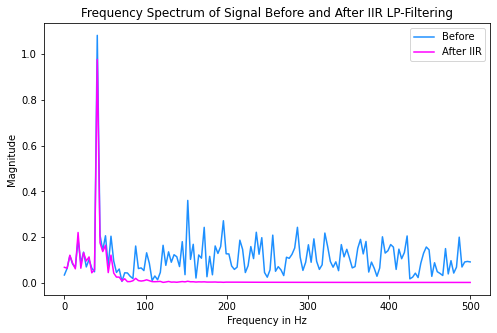

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np


plt.figure(figsize=(8, 5))
dt = 1/sample_rate
xf = np.linspace(0.0, 1.0/(2.0*dt), (nsamples-1)//2)
Sigf = fft(signal)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(Sigf[0:(nsamples-1)//2]),color='dodgerblue',label='Before')

FiltdSigiir = fft(filtered_signal_iir)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(FiltdSigiir[0:(nsamples-1)//2]),color='fuchsia',label='After IIR')
plt.ylabel('Magnitude')
plt.xlabel('Frequency in Hz')
plt.title('Frequency Spectrum of Signal Before and After IIR LP-Filtering', fontsize=12)
plt.legend()
plt.show()

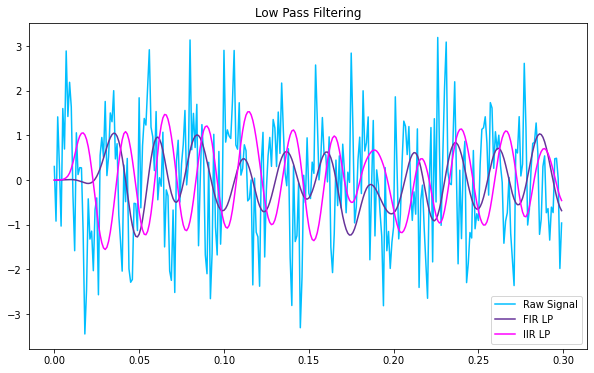

In [ ]:
#------------------------------------------------
# Comparison of FIR and IIR filter 
#------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(t, signal,color='deepskyblue',label='Raw Signal')
plt.plot(t, filtered_signal_fir, '-',color='rebeccapurple', label='FIR LP')
plt.plot(t, filtered_signal_iir, '-',color='fuchsia', label='IIR LP')
plt.title('Low Pass Filtering')
plt.legend()
plt.show()

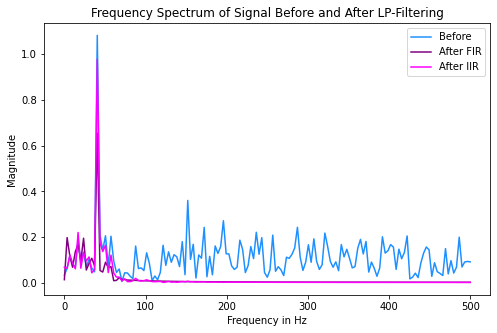

In [ ]:
plt.figure(figsize=(8, 5))
dt = 1/sample_rate
xf = np.linspace(0.0, 1.0/(2.0*dt), (nsamples-1)//2)
Sigf = fft(signal)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(Sigf[0:(nsamples-1)//2]),color='dodgerblue',label='Before')

FiltdSigfir = fft(filtered_signal_fir)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(FiltdSigfir[0:(nsamples-1)//2]),color='purple',label='After FIR')
FiltdSigiir = fft(filtered_signal_iir)  # Compute FFT of noisy signal
plt.plot(xf, 2.0/nsamples * np.abs(FiltdSigiir[0:(nsamples-1)//2]),color='fuchsia',label='After IIR')
plt.ylabel('Magnitude')
plt.xlabel('Frequency in Hz')
plt.title('Frequency Spectrum of Signal Before and After LP-Filtering', fontsize=12)
plt.legend()
plt.show()